## Importando as bibliotecas

In [179]:
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np
import seaborn           as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn                 import metrics

warnings.filterwarnings('ignore')
%matplotlib inline

## Carregando o dataset

In [180]:
dados = pd.read_csv('/Users/fernanda/Library/Mobile Documents/com~apple~CloudDocs/alura/reg-linear/Dados/Consumo_cerveja.csv', sep= ';')
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


- Tamanho do dataset

In [181]:
dados.shape

(365, 7)

## Análises Preliminares

- Estatística descritiva

In [182]:
dados.describe().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,21.0,17.0,27.0,5.0,0.0,25401.0
std,3.0,3.0,4.0,12.0,0.0,4399.0
min,13.0,11.0,14.0,0.0,0.0,14343.0
25%,19.0,15.0,24.0,0.0,0.0,22008.0
50%,21.0,18.0,27.0,0.0,0.0,24867.0
75%,23.0,20.0,29.0,3.0,1.0,28631.0
max,29.0,24.0,36.0,95.0,1.0,37937.0


#### Matriz de correlação 
O **coeficiente de correlação** é uma medida de associaç˜zo linear entre duas variáveis e situa-se entre -1 e +1 sendo que **-1** indica associação negativa perfeita e **+1** indica associação positiva perfeita.

In [183]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


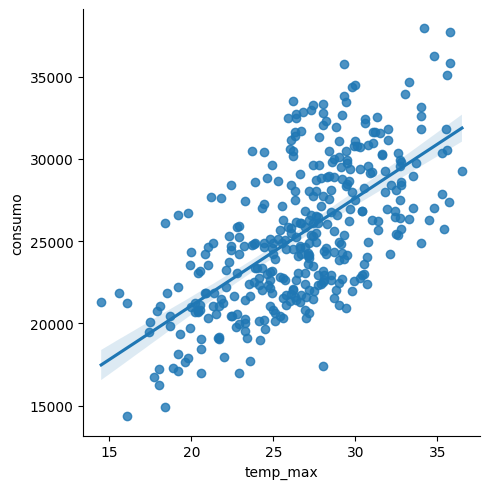

In [184]:
#Plotando as variáveis "temp_max"(x) e "consumo"(y) com forte correlação positiva.
sns.lmplot(x='temp_max', y='consumo', data = dados)

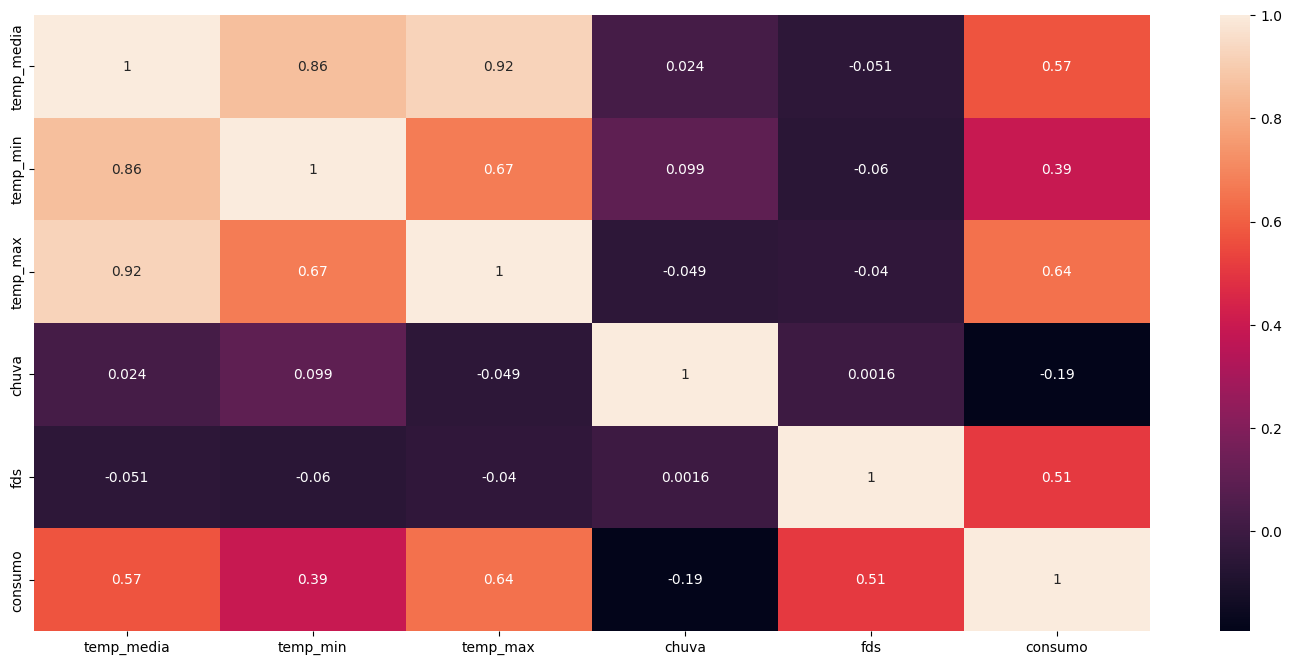

In [185]:
#Plotando as variáveis "temp_max"(x) e "consumo"(y) com forte correlação positiva.
plt.rcParams['figure.figsize'] = (18,8)
ax = sns.heatmap(dados.corr(), annot=True)

## Comportamento da variável Dependente(Y)

- Análises gráficas

Plotando a variável Alvo (y)

Text(0.5, 0, 'Dias')

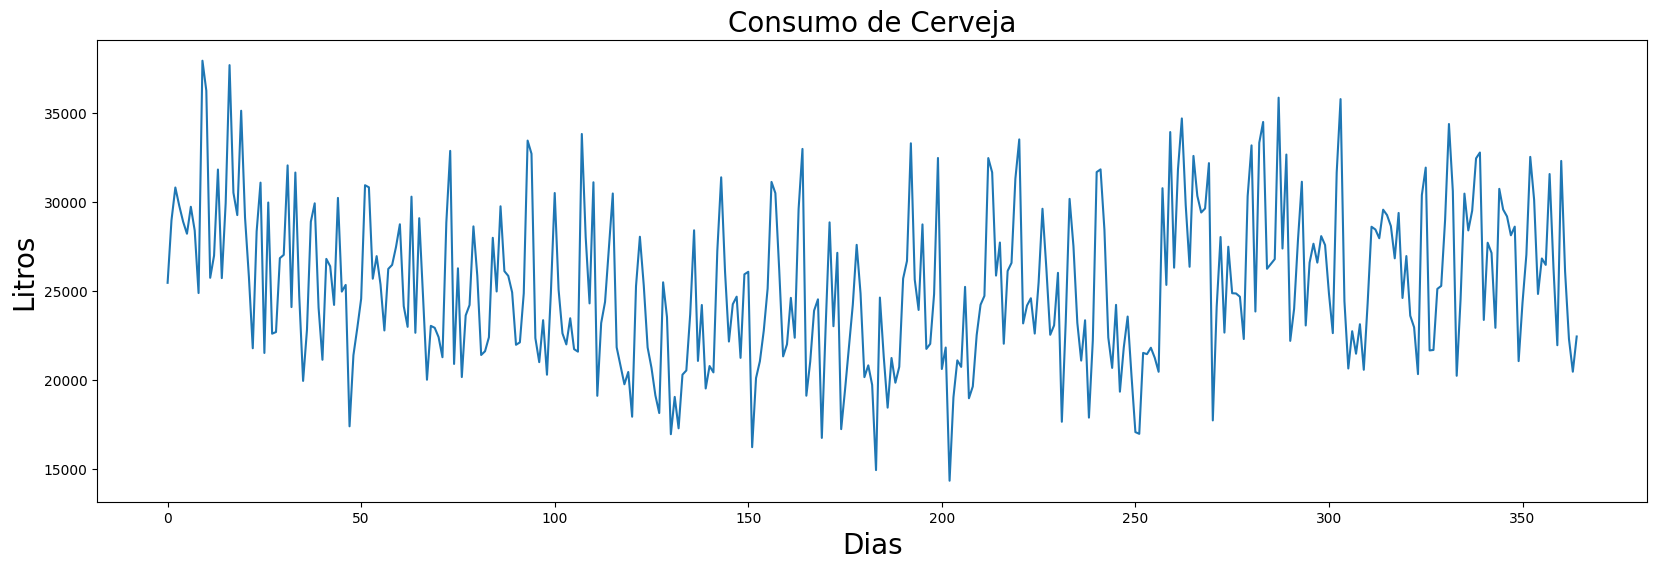

In [186]:
fig = plt.subplots(figsize=(20,6))
ax  = dados.consumo.plot()

#lables do gráfico
ax.set_title('Consumo de Cerveja', fontsize=20)
#lables dos eixos
ax.set_ylabel('Litros', fontsize=20)
ax.set_xlabel('Dias', fontsize=20)

- BoxPlot da variável dependente(y)

Text(0.5, 0, 'Dias')

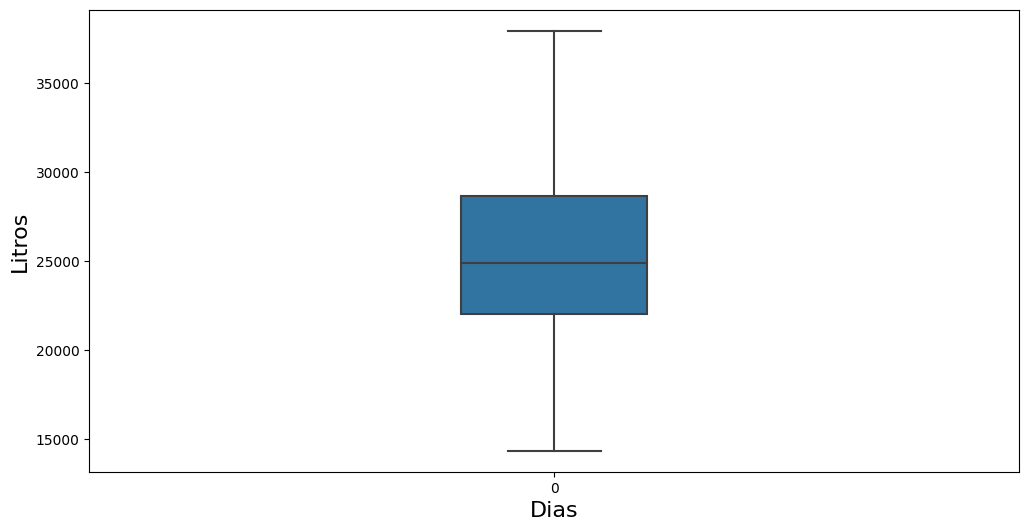

In [187]:
ax = sns.boxplot(data=dados.consumo, width=0.2)
#Formatação do tamanho
ax.figure.set_size_inches(12,6)
#lables dos eixos
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)

- BoxPlot com duas variáveis 

<AxesSubplot: title={'center': 'Consumo de Cerveja'}, xlabel='Temperatura Máxima', ylabel='Consumo'>

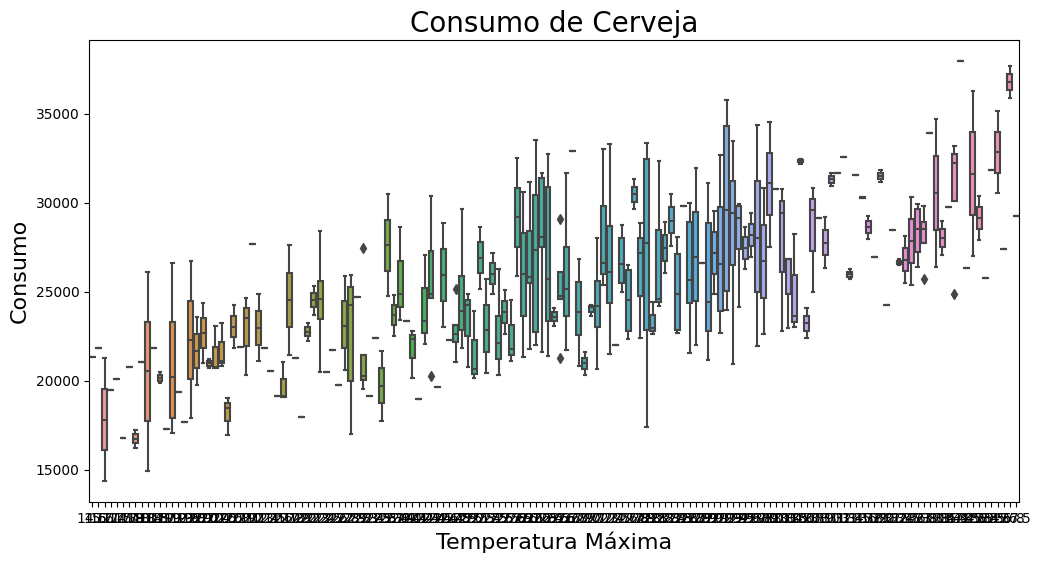

In [188]:
ax = sns.boxplot(x='temp_max', y='consumo', data=dados , orient='v')
#Formatação do tamanho
ax.figure.set_size_inches(12,6)
#titulo
ax.set_title('Consumo de Cerveja', fontsize=20)
#lables dos eixos
ax.set_xlabel('Temperatura Máxima', fontsize=16)
ax.set_ylabel('Consumo', fontsize=16)
ax

## Distribuição de frequências 

 Distribuição de frequncias da variável dependente (y)

<AxesSubplot: title={'center': 'Distribuição de Frequências'}, xlabel='consumo', ylabel='Consumo de cerveja (litros)'>

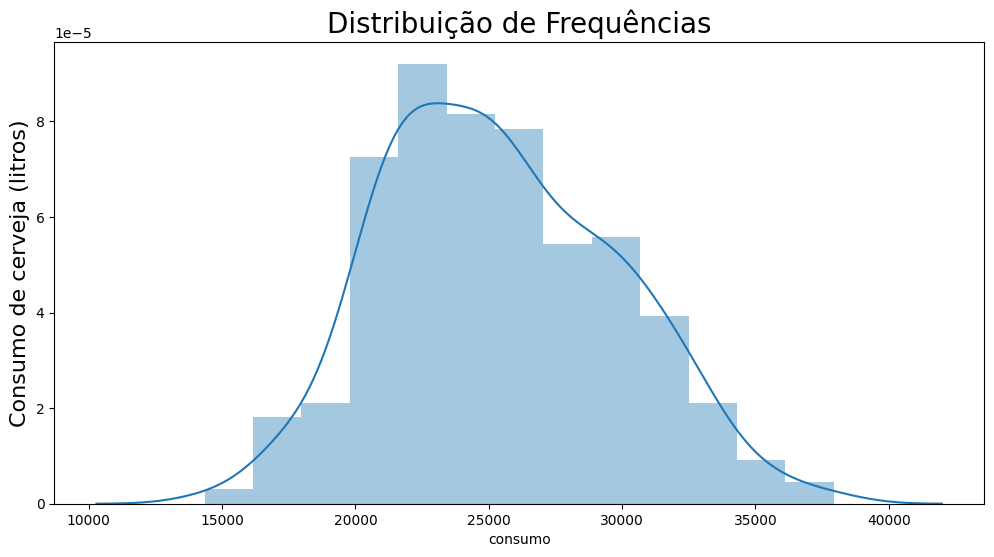

In [189]:
ax = sns.distplot(dados.consumo)
ax.figure.set_size_inches(12,6)
#titulo
ax.set_title('Distribuição de Frequências', fontsize=20)
#lables dos eixos
ax.set_ylabel('Consumo de cerveja (litros)', fontsize=16)
ax

## Variável Dependente X Variável Explicativas (pairplot)

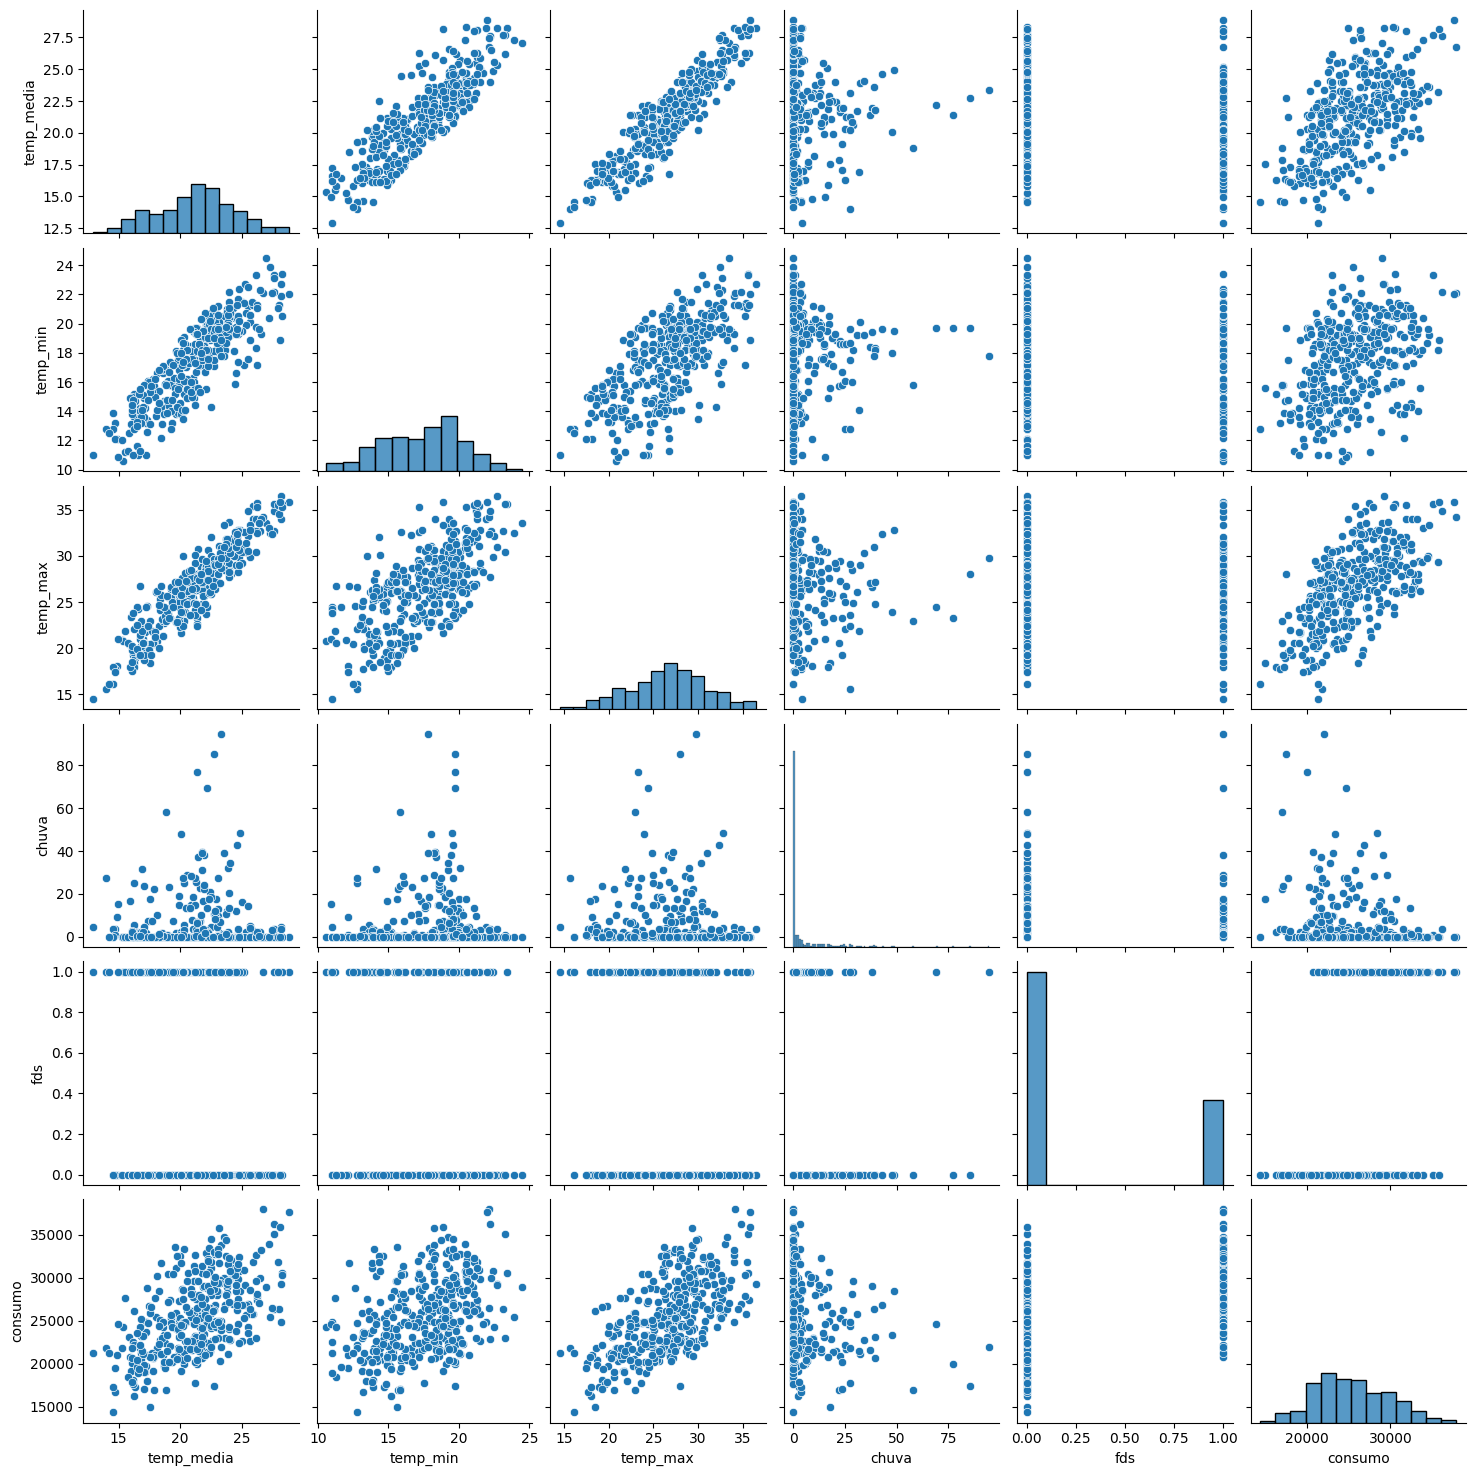

In [190]:
ax = sns.pairplot(dados)

- Plotando o pairplot fixando somente uma variável no eixo y 

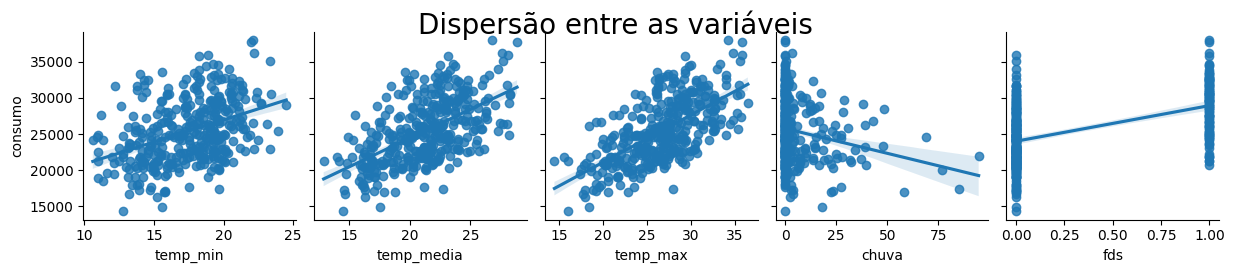

In [191]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min',
                                                 'temp_media',
                                                 'temp_max',
                                                 'chuva',
                                                 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.05)
ax

## Estimando um modelo de regressão linear para o Consumo 

 A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

- Criando uma Series (pandas) para armazenar o consumo de cerveja (y)

In [192]:
y = dados.consumo

- Criando um DataFrame(pandas) para armezenar as variáveis explicativas (x) 

In [193]:
X = dados[['temp_max', 'chuva', 'fds']]

- Criando os datasets de treino e de teste

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=2811)

- Verificando os tamanhos dos arquivos gerados pela função train_test_split       

In [195]:
X_train.shape

(255, 3)

In [196]:
X_test.shape

(110, 3)

In [197]:
X_train.shape[0] + X_test.shape[0]

365

- Instanciando a classe LinearRegression()

In [198]:
modelo = LinearRegression()

- Utilizando o método fit() do objeto 'modelo' para estimular nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

In [215]:
modelo.fit(X_train, y_train)

LinearRegression()

### Obtendo o coeficiente de determinação (R2) do modelo estimado com os dados de TREINO 

- Coeficiente de Determinação - R2

O coeficiente de determinação (R2) é uma medida resumida que diz quanto linha de regressão ajusta-se aos dados. É um valor entre 0 e 1.

In [200]:
r = modelo.score(X_train, y_train).round(2)
r

0.73

- Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto 'modelo'.

In [201]:
previsto = modelo.predict(X_test)

- Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [202]:
r2 = metrics.r2_score(y_test, previsto.round(2))*100
r2

69.07364951307625

## Obtendo Previsões Pontuais 

- Dados de entrada 

In [203]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


- Gerando previsão pontual (da linha 0) em litros

In [204]:
modelo.predict(entrada)[0]

26094.901775262017

- Criando um simulador simples

In [205]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada  = [[temp_max, chuva, fds]]
modelo.predict(entrada)[0]

26094.901775262017

## Obtendo o intercepto do modelo

O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.

In [206]:
modelo.intercept_

5951.9763393124595

In [207]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.

In [208]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [209]:
type(modelo.coef_)

numpy.ndarray

- Confirmando a ordem des variáveis explicativas no DataFrame

In [210]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

- Criando uma lista com os nomes das variáveis do modelo

In [96]:
index= ['Intercepto', 'Temperatura Máxima', 'Chuva(mm)', 'Final de Semana']

- Criando um DataFrame para armazenar os coeficientes do modelo

In [97]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index= index, columns= ['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva(mm),-60.782435
Final de Semana,5401.083339


## Interpretação dos coeficientes estimados

Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.

## Análises gráficas das previsões do modelo

- Gerando as previsões do modelo para os dados de TREINO

In [98]:
y_previsto_train = modelo.predict(X_train)

- Gráfico de dispersão entre valor estimado e valor real 

<AxesSubplot: title={'center': 'Previsão X Real'}, xlabel='Consumo de cerveja (litros) - Previsão ', ylabel='Consumo de cerveja (litros) - Real'>

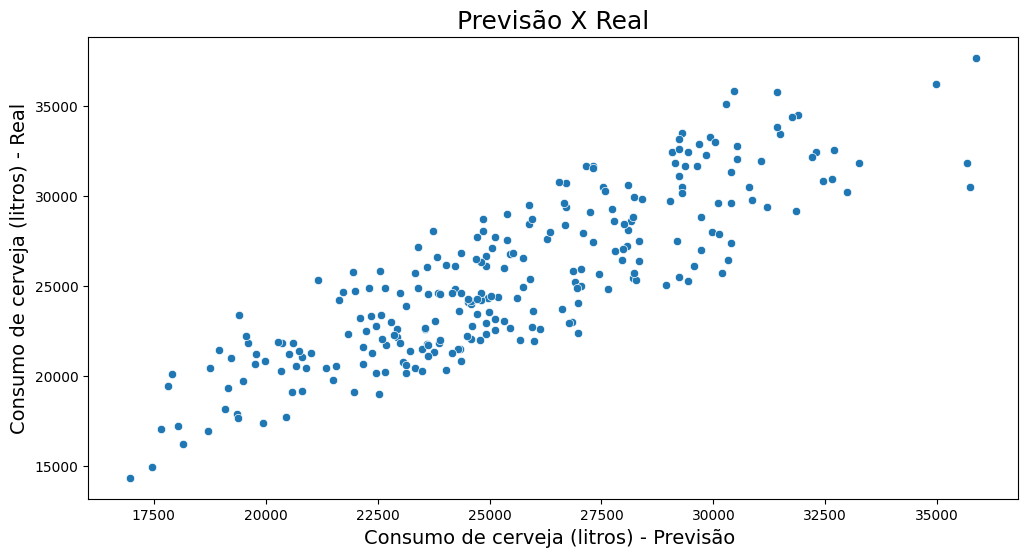

In [99]:
ax= sns.scatterplot(x= y_previsto_train, y= y_train)

ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de cerveja (litros) - Previsão ', fontsize=14)
ax.set_ylabel('Consumo de cerveja (litros) - Real', fontsize=14)
ax

- Obtendo resíduos

In [120]:
residuo = y_train - y_previsto_train

- Gráfico de dispersão entre valor estimado e resíduos 

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<AxesSubplot: title={'center': 'Resíduo X Previsão'}, xlabel='Consumo de cerveja (litros) - Previsão ', ylabel='Resíduo'>

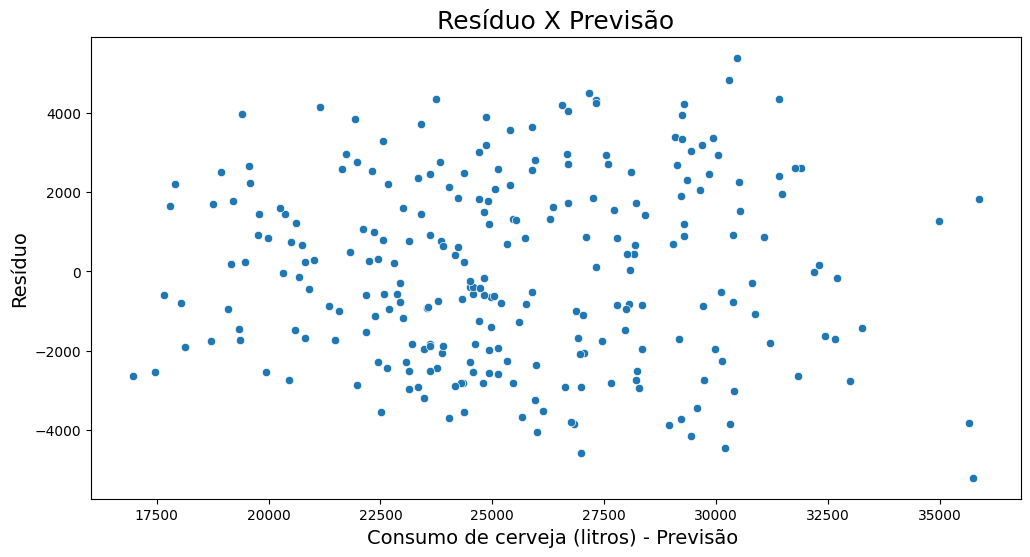

In [121]:
ax= sns.scatterplot(x= y_previsto_train, y= residuo)

ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduo X Previsão', fontsize=18)
ax.set_xlabel('Consumo de cerveja (litros) - Previsão ', fontsize=14)
ax.set_ylabel('Resíduo', fontsize=14)
ax

- Utilizando os resíduos ao quadrado

<AxesSubplot: title={'center': 'Resíduo X Previsão'}, xlabel='Consumo de cerveja (litros) - Previsão ', ylabel='Resíduo'>

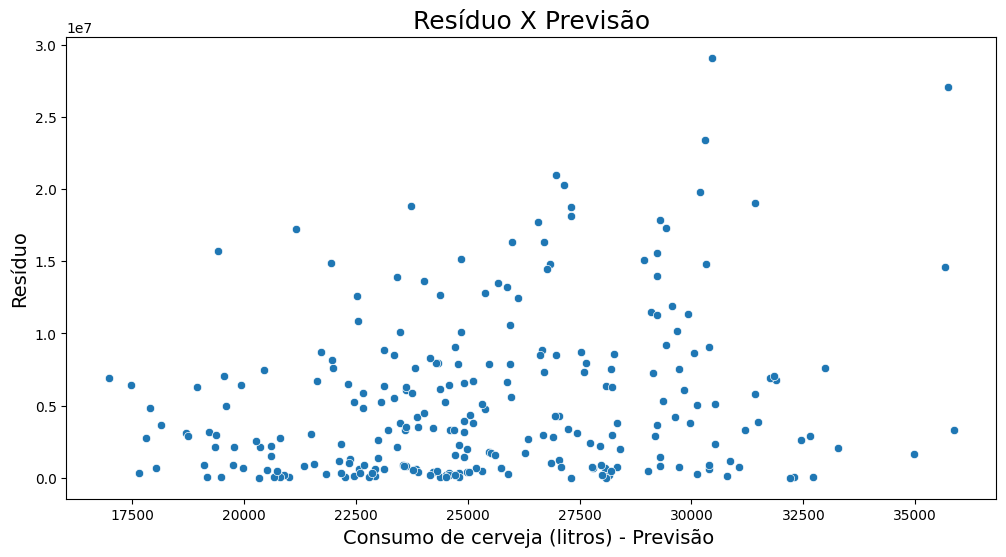

In [122]:
ax= sns.scatterplot(x= y_previsto_train, y= residuo**2)

ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduo X Previsão', fontsize=18)
ax.set_xlabel('Consumo de cerveja (litros) - Previsão ', fontsize=14)
ax.set_ylabel('Resíduo', fontsize=14)
ax

- Plotando a distrubuicão de frequência dos residuos

<AxesSubplot: title={'center': 'Dsitribuicão de frequencia dos resíduos'}, xlabel='Litros', ylabel='Density'>

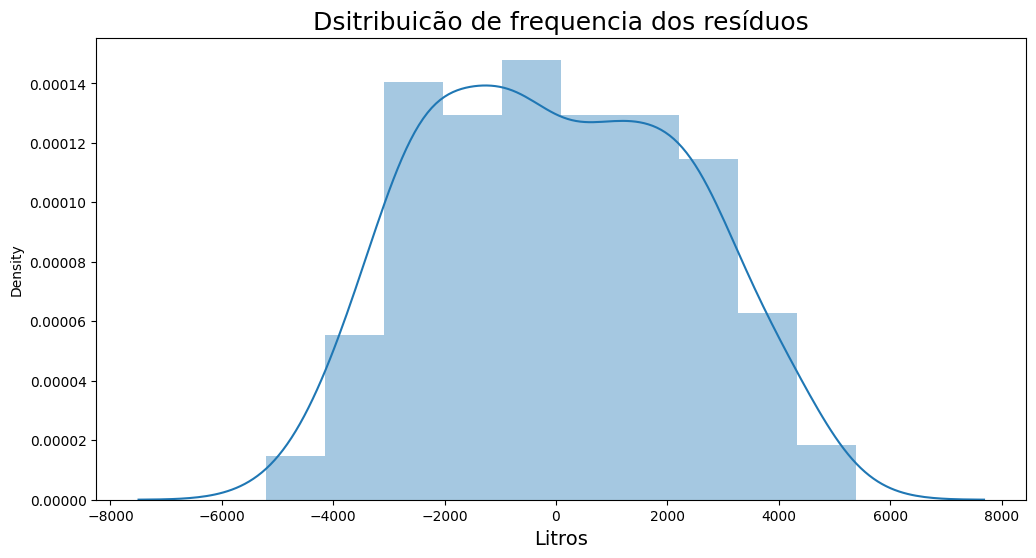

In [123]:
ax= sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Dsitribuicão de frequencia dos resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

## Comparando Modelos

- Estimando um modelo com a substituição de variável explicativa Temperatura Máxima pela Temperatura Média.

In [124]:
X2 = dados[['temp_media', 'chuva', 'fds']]

- Criando os datasets de treino e de teste 

In [125]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size= 0.3, random_state=2811)

- Instanciando a classe LinearRegression()

In [130]:
modelo_2 = LinearRegression()

- Utilizando o método fit() do objeto 'modelo_2' para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)


In [133]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

- Obtendo o coeficiente de determinação (R2) do novo modelo estimado e comparando como resultado do modelo anterior.

In [154]:
print('Modelo com temperatura média')
print(f'R2 = {modelo_2.score(X2_train, y2_train).round(2)}')

Modelo com temperatura média
R2 = 0.66


In [155]:
print('Modelo com temperatura máxima')
print(f'R2 = {modelo.score(X_train, y_train).round(2)}')

Modelo com temperatura máxima
R2 = 0.73


- Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método predict()dos objetos 'modelo'e 'modelo_2''m

In [156]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

- Obtendo o coeficiente de deerminação (R2) para as previsões dos dois modelos 

In [157]:
print('Modelo com temperatura média')
print(f'R2 = {metrics.r2_score(y2_test, y_previsto_2.round(2))}')

Modelo com temperatura média
R2 = 0.6574589993661126


In [158]:
print('Modelo com temperatura máxima')
print(f'R2 = {metrics.r2_score(y_test, y_previsto.round(2))}')

Modelo com temperatura máxima
R2 = 0.6907364951307624


## Outras métricas

Erro quadrático médio (quanto menor o valor do erro melhor é o modelo)

Raiz do erro quadrático médio

- Obtendo métricas para o modelo com temperatura média 

In [165]:
eqm_2 = metrics.mean_squared_error(y2_test, y_previsto_2.round(2))
reqm_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
r_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)
pd.DataFrame([eqm_2,reqm_2,r_2], ['Erro quadrático médio', 
                                  'Raiz do erro quadrático médio',
                                  'R2'], 
                                columns = ['Métricas'])

,Métricas
Erro quadrático médio,6.060774e+06
Raiz do erro quadrático médio,2.461860e+03
R2,6.600000e-01


- Obtendo métricas para o modelo com temperatura máxima

In [169]:
eqm = metrics.mean_squared_error(y_test, y_previsto.round(2))
reqm = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
r = metrics.r2_score(y_test, y_previsto).round(2)
pd.DataFrame([eqm,reqm,r], ['Erro quadrático médio', 
                                  'Raiz do erro quadrático médio',
                                  'R2'], 
                                columns = ['Métricas'])

,Métricas
Erro quadrático médio,5.471976e+06
Raiz do erro quadrático médio,2.339230e+03
R2,6.900000e-01


## Salvando e carregando o modelo estimado

- Dados de entrada

In [170]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [ ]:
entrada = X_test[0:1]

- Gerando previsão pontual

In [173]:
modelo.predict(entrada)[0].round(2)

26094.9

- Criando um simulador simples

In [176]:
temp_max=30.5
chuva=12.2
fds=0
entrada=[[temp_max, chuva, fds]]

print(f'{modelo.predict(entrada)[0].round(2)} litros')

26094.9 litros


## Salvando o modelo estimado 

O módulo **pickle** implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.

In [214]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()